In [2]:
import os
import re
def extract_label_and_filename(filename):
    # Extract the base filename without the extension
    base_filename = os.path.splitext(filename)[0]
    
    # Extract the portion of the filename before the first hyphen
    match = re.search(r'\.(.*?)\-', base_filename)
    if match:
        label = match.group(1)
    else:
        label = base_filename  # If no hyphen, use the whole base filename
    
    # Add back the .jpg extension to the filename
    label = label.replace(" ", "")
    full_filename = base_filename + ".jpg"
    
    return label, full_filename

def process_jpg_folder(folder_path):
    labels = []
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.jpeg'):
            label, full_filename = extract_label_and_filename(file_name)
            labels.append(label)
    
    return labels


In [3]:
labels = process_jpg_folder('preprocessed_plates')
print(labels)

['E3977QM', 'E5894SZ', 'E6467QW', 'E4604PS', 'E6984P', 'E6387PL', 'E4939PAE', 'E6430QO', 'E4670TL', 'E4145QZ', 'E5860ST', 'E4026SL', 'E6562QO', 'E4753QV', 'E6810IX', 'E5718OT', 'E2283RG', 'E3536O', 'E5305SM', 'E5241TP', 'E2251TI', 'E4885QZ', 'E4538QK', 'E2462QF', 'E6464TI', 'E4112RJ', 'E3206PAO', 'E4603PAE', 'E4564RRR', 'E4172QB', 'E3453TN', 'E6932TW', 'E4877SV', 'E6410TX', 'E5313TF', 'E9967P', 'E5789QD', 'E6298SS', 'E6586PAM', 'E2194Q', 'E4721SJ', 'E3916P', 'E4958QS', 'E4746PAI', 'E5515QG', 'E1129RP', 'E5997QP', 'E3860PAK', 'E3229SQ', 'E5279SD', 'E3063RS', 'E2035SO', 'E3485SZ', 'E2881QAA', 'E3052QU', 'E4217TT', 'E3088PAK', 'E6686PAI', 'E5090TW', 'E3772SV', 'E6930RS', 'E6151PAL', 'E3392TZ', 'E3426SB', 'E6735QV', 'E5737PAB', 'E5084RY', 'E3598PAD', 'E2707SP', 'E3332ST', 'E4539RC', 'E6804RV', 'E3543PAG', 'E5555SR', 'E2989OZ', 'E4314RP', 'E4092PAE', 'E2637WM', 'E4172QC', 'E3913QS', 'E5605QZ', 'E6526QX', 'E4019TL', 'E2091SD', 'E6962PAA', 'E4386IY', 'E2380SA', 'E5430SL', 'E3934PAI', 'E3865PA

Load PaddleOCR and use on License Plate

[2024/08/13 17:13:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Alvino Angelo/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Alvino Angelo/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320'

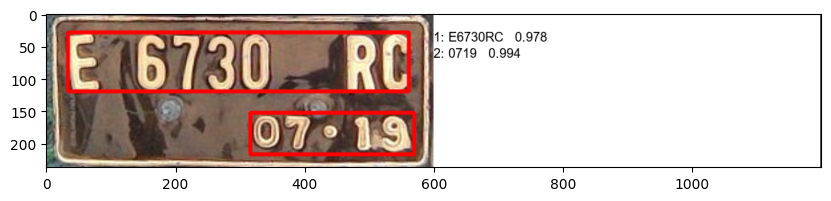

In [4]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
from matplotlib import pyplot as plt

# Initialize the PaddleOCR model
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # use 'ch' for Chinese or 'en' for English
font_path = 'C:/Windows/Fonts/arial.ttf'
# List of image paths
image_paths = [
    'CRNN/images/test/351.E 6730 RC-07-19.jpeg'
]

# Process each image
for img_path in image_paths:
    # Read the image
    img = cv2.imread(img_path)

    # Perform OCR
    result = ocr.ocr(img, cls=True)

    # Extract and print the recognized text
    for line in result:
        print(f"Predicted text: {' '.join([word_info[1][0] for word_info in line])}")

    # Optionally, visualize the results
    boxes = [res[0] for res in line]
    txts = [res[1][0] for res in line]
    scores = [res[1][1] for res in line]

    # Draw results on the image
    img_with_boxes = draw_ocr(img, boxes, txts, scores, font_path=font_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_with_boxes)
    plt.show()


Combine YOLO and PaddleOCR

[2024/08/13 18:39:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Alvino Angelo/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Alvino Angelo/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320'

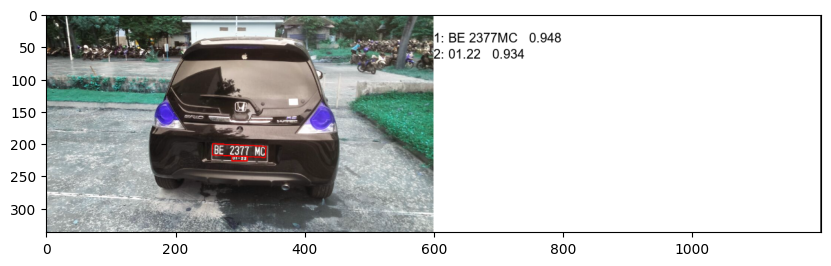

In [4]:
from ultralytics import YOLO
from paddleocr import PaddleOCR, draw_ocr
import cv2
from matplotlib import pyplot as plt
import os
import re
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
# Load your pretrained YOLO model
model = YOLO('runs\\train\\alpr_model\\weights\\best.pt')

# Initialize the PaddleOCR model
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Function to detect license plates using YOLO
def detect_plates(image):
    results = model(image)
    
    plate_boxes = []
    for result in results:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box[:4])
            plate_boxes.append([x1, y1, x2, y2])
    
    return plate_boxes

# List of image paths
image_paths = [
    'IMG-20180108-WA0076.jpg']

# Process each image
for img_path in image_paths:
    # Read the image
    img = cv2.imread(img_path)

    # Perform OCR
    result = ocr.ocr(img, cls=True)

    # Extract and print the recognized text
    for line in result:
        print(f"Predicted text: {' '.join([word_info[1][0] for word_info in line])}")

    # Optionally, visualize the results
    boxes = [res[0] for res in line]
    txts = [res[1][0] for res in line]
    scores = [res[1][1] for res in line]

    # Draw results on the image
    img_with_boxes = draw_ocr(img, boxes, txts, scores, font_path='C:/Windows/Fonts/arial.ttf')
    plt.figure(figsize=(10, 10))
    plt.imshow(img_with_boxes)
    plt.show()


Odd or Even Function

In [5]:
def determine_odd_even(text):
    # Extract the numeric part of the text
    numeric_part = re.findall(r'\d+', text)
    if numeric_part:
        last_digit = int(numeric_part[-1][-1])  # Get the last digit of the last number
        if last_digit % 2 == 0:
            return "Even"
        else:
            return "Odd"
    else:
        return "No numeric part found"

In [11]:
print(line[0][1][0])
print(determine_odd_even(line[0][1][0]))

BE 2377MC
Odd
